# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [260]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import shuffle

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.*
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

Решение находится в отправленном pdf файле.

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

![bike2.jpg](attachment:bike2.jpg)

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [263]:
data = pd.read_csv('day.csv')

# Оставляем только нужные колонки
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]

categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

# Разбиваем данные на обучающую и тестовую части
train, test = train_test_split(data, test_size=0.2)

В данном коде я не только разбил выборку на обучающую и тестовую части, а еще и определил, какие признаки категориальные, а какие вещественные.

Таргетом является количество арендованных велосипедов в день (`cnt`)

Вещественными являются: `temp`, `atemp`, `hum`, `windspeed`

Категориальными являются: `season`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`

Признаки я распределил по таком критерию: если можно значение заменить на строку и при этом признак не теряет свою информативность, то это категориальный признак, иначе вещественный.

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

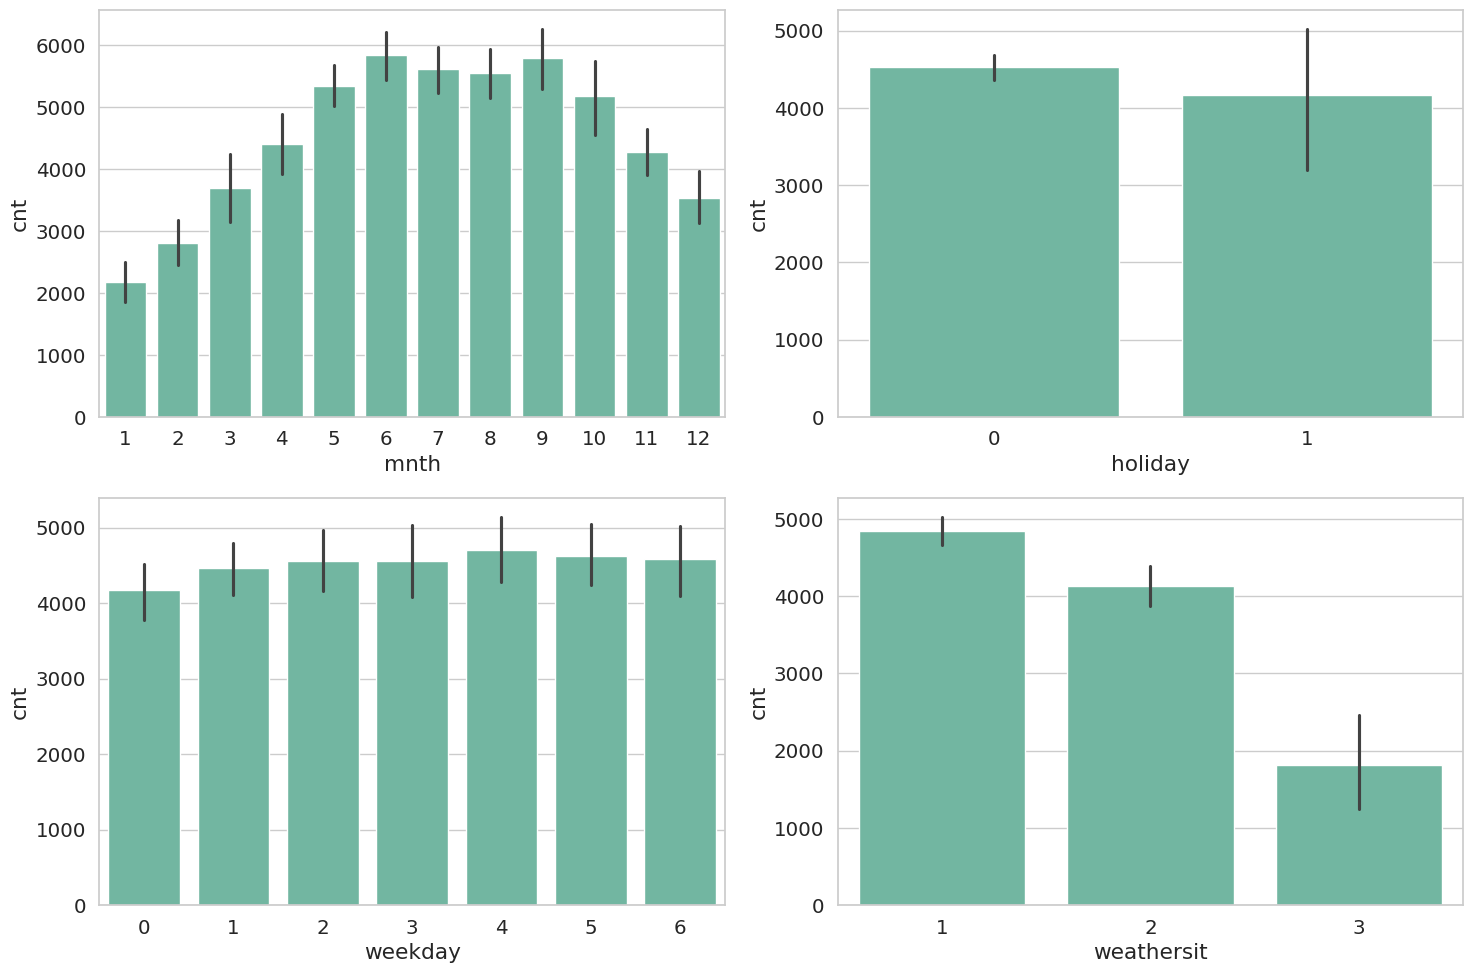

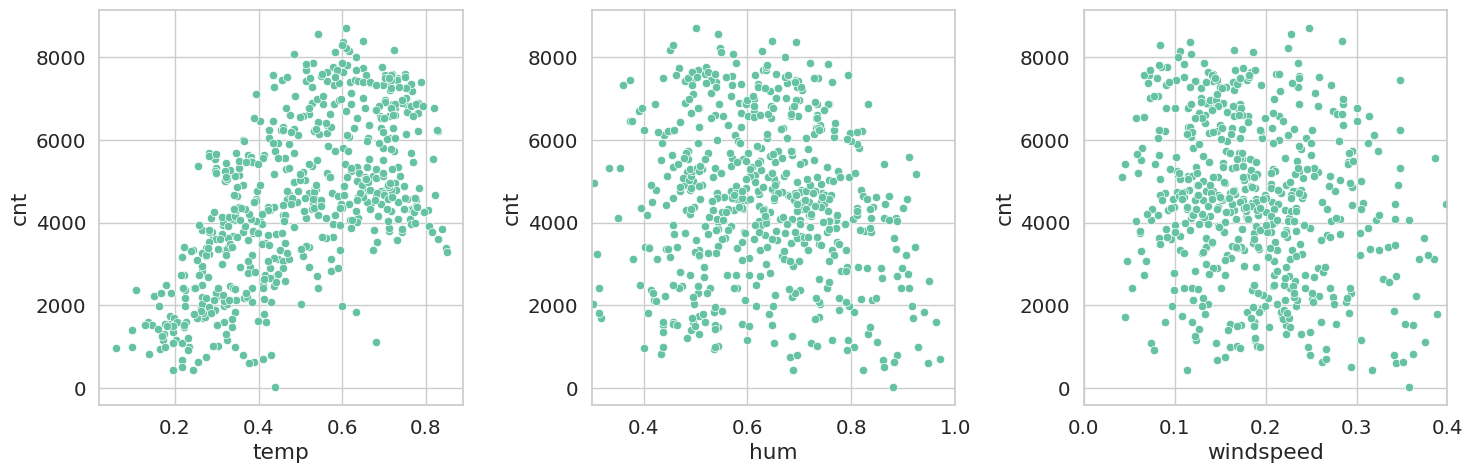

In [264]:
# Анализ категориальных признаков
# Строим boxplot для категориальных признаков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(['mnth', 'holiday', 'weekday', 'weathersit']):
    sns.barplot(x=feature, y='cnt', data=train, ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

# Анализ вещественных признаков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='temp', y='cnt', data=train, ax=axes[0])
sns.scatterplot(x='hum', y='cnt', data=train, ax=axes[1])
axes[1].set_xlim(0.3, 1)
sns.scatterplot(x='windspeed', y='cnt', data=train, ax=axes[2])
axes[2].set_xlim(0, 0.4)

plt.tight_layout()
plt.show()

**Ответ на вопрос:** Нет, не допустимо выполнять арифметические операции для некоторых категориальных признаков, так как их значения упорядочены только для удобства восприятия, то есть они должны быть равносильны, а с арифметическими операциями они будут весить по-разному. Например, времена года - у данного признака значения от 1 до 4, хотя по факту между временами года нет какого-либо различия, чтобы его так оценить.

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** Да, выбросы на графиках были, я ограничил значения, чтобы улучшить информативность. Также я убрал признак `atemp`, потому что они практически совпадают с `temp`, что будет портить зависимость.

В данном случае нет смысла рассматривать какие-либо нелинейные функции, потому что информативность от этого не улучшается.

На данных графиках видно, что количество сильно зависит от месяца и от погоды. Также к концу недели количество возрастает с пиковым значением в пятницу.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**а).** Удаление ненужных признаков: удаление ненужных признаков, которые не влияют на целевую переменную или являются избыточными.

**б).** Заполнение пропущенных значений: идентификация пропущенных значений в данных. Заполнение пропущенных значений средними, медианами или модами для вещественных признаков, либо наиболее часто встречающимся значением для категориальных признаков.

**в).** Обработка выбросов: идентификация выбросов с помощью визуального анализа и статистических методов.
Удаление выбросов либо применение методов замены выбросов (например, замена выбросов медианой или средним).

**г).** Преобразование вещественных признаков: преобразование вещественных признаков, если они не распределены нормально, например, с помощью логарифмического преобразования.
Масштабирование признаков, например, стандартизация или нормализация.

**д).** Преобразование категориальных признаков: преобразование категориальных признаков в числовой формат с помощью метода One-Hot Encoding или Label Encoding.

**е).** Валидация предобработки данных: проверка корректности проведенных преобразований с помощью визуального анализа и статистических методов.

Реализуйте данную процедуру.

In [265]:
# Я убрал ненужные признаки до этого
# Пропущенных значений нет, поэтому шаг пропускаем

# Удаление выбросов
train = train[train['hum'] >= 0.3]
train = train[train['windspeed'] <= 0.4]

# Преобразование категориальных признаков
transformer = OneHotEncoder(drop='first', sparse_output=False)
train_transformed = transformer.fit_transform(train[categorial_features])
train_final = np.hstack([train[real_features], train_transformed])

# Преобразуем тестовые данные
test_transformed = transformer.transform(test[categorial_features])
test_final = np.hstack([test[real_features], test_transformed])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [266]:
model = LinearRegression(fit_intercept=True)
model.fit(train_final, train[target_feature])

model.coef_

array([ 7.00862141e+03, -3.67208127e+03, -4.02117797e+03,  5.81003430e+02,
        7.68255509e+02,  1.79894286e+03,  9.78983506e+01,  3.06874915e+02,
        1.67654071e+02,  3.01687814e+02, -3.10967786e+02, -1.07987544e+03,
       -6.82705141e+02,  3.42697088e+02, -1.99423933e+02, -5.60191195e+02,
       -3.01359439e+02, -1.51721105e+02, -6.69140581e+01, -4.62438857e+00,
        1.63481484e+02, -2.13224793e+01,  1.14312684e+02,  5.14027146e+02,
        3.36654347e+02, -7.75637878e+01, -1.51108746e+03])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [267]:
# Делаем предсказание значений
test_predictions = model.predict(test_final)

y_test = test[target_feature]

# Считаем ошибки
rmse = np.sqrt(((y_test - test_predictions) ** 2).mean())

mae = metrics.mean_absolute_error(y_test, test_predictions)

mape = 100 * (np.abs(y_test - test_predictions) / y_test).mean()
print(f"Sklearn model: RMSE = {rmse} \t MAE = {mae} \t MAPE = {mape}")

Sklearn model: RMSE = 1289.0332877487306 	 MAE = 1102.1276515138081 	 MAPE = 29.82285488287856


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [268]:
# Считаем значения по формуле (X.T * X)^(-1) * X.T * Y
XTX = np.dot(train_final.T, train_final)
XTX_inv = np.linalg.inv(XTX)

# Обработка ситуации, когда матрица XTX вырождена
if np.linalg.cond(XTX) < 1 / np.finfo(XTX.dtype).eps:
    print("Матрица XTX вырождена")

theta = np.dot(XTX_inv, np.dot(train_final.T, train[target_feature]))
print("Оценка коэффициентов:", theta)

# Считаем предсказания
test_predictions = np.dot(test_final, theta)

# Считаем ошибки
rmse = np.sqrt(((y_test - test_predictions) ** 2).mean())

mae = metrics.mean_absolute_error(y_test, test_predictions)

mape = 100 * (np.abs(y_test - test_predictions) / y_test).mean()
print(f"My own model: RMSE = {rmse} \t MAE = {mae} \t MAPE = {mape}")

Оценка коэффициентов: [-30872.73535708  10492.78934748  78824.39562272  13276.31865763
  15368.46778711  12004.8173952   -5716.60551197 -11927.42661415
 -27692.7229132   -9404.18148014 -11272.21930235 -11530.45220882
  -9304.58303875 -11057.3875146  -10302.42926173 -14428.62052281
 -11783.83581254      0.          -4096.              0.
      0.           4096.              0.            837.38525111
      0.           -431.9864251   -2583.56630112]
My own model: RMSE = 9373.91786977675 	 MAE = 7325.343430067248 	 MAPE = 246.28421545737496


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [269]:
# Добавляем регулязационный член
alpha = 0.1
train_with_alpha = train_final.T.dot(train_final) + alpha * np.eye(train_final.shape[1])

# Вычисляем обратную матрицу
X_train_with_alpha_inv = np.linalg.inv(train_with_alpha)

# Вычисляем коэффициенты линейной регрессии
theta = X_train_with_alpha_inv.dot(train_final.T).dot(train[target_feature])

print("Оценки коэффициентов:", theta)

# Считаем предсказания
test_predictions = np.dot(test_final, theta)

# Считаем ошибки
rmse = np.sqrt(((y_test - test_predictions) ** 2).mean())

mae = metrics.mean_absolute_error(y_test, test_predictions)

mape = 100 * (np.abs(y_test - test_predictions) / y_test).mean()
print(f"My own model with regularization: RMSE = {rmse} \t MAE = {mae} \t MAPE = {mape}")

Оценки коэффициентов: [ 7735.46532131  -591.74898082  -836.28475287   523.0563443
   664.05090641  1782.6093659    594.58757842   632.78374547
   406.13526312   328.07163305    30.00582134  -849.89271522
  -555.47987271   442.28815192    23.99087857  -202.85098518
    29.88288737    77.0047684    -13.01052858    74.83220654
   211.09584985   123.67656267   259.22706549   836.88224487
   578.81638757  -443.18108161 -2602.34881612]
My own model with regularization: RMSE = 1352.5405863541228 	 MAE = 1165.5044561710074 	 MAPE = 31.775444733735615


Сделайте выводы. В показанном примере мы видим, что матрицы почти вырождены (индикатор не срабатывает, а вот ошибка огромная). Следовательно, это проблема, которую нужно исправлять, и регуляризационный член спасает нас.
Я запускал много раз и получал разные MAPE: от 26 до 39%. Это доказывает тот факт, что коэффициенты сильно зависят от обучающей выборки. Поэтому следует анализировать данные и убирать "плохие" объекты перед построением модели.

**Выводы:**

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели.

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Решение находится в отправленном pdf файле.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

![ubike.png](attachment:ubike.png)

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [270]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''

        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.theta = None


    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        n, d = X.shape

        # Добавляем константный признак, если fit_intercept=True
        if self.fit_intercept:
            X = np.c_[np.ones((n, 1)), X]
            d += 1

        # Вычисляем оценки коэффициентов
        XTX = X.T.dot(X)
        ridge_matrix = XTX + self.lambd * np.eye(d)  # добавляем регуляризацию
        ridge_inv = np.linalg.inv(ridge_matrix)
        self.theta = ridge_inv.dot(X.T).dot(Y)

        return self


    def predict(self, X):
        '''
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        n = X.shape[0]

        # Добавляем константный признак, если fit_intercept=True
        if self.fit_intercept:
            X = np.c_[np.ones((n, 1)), X]

        # Вычисляем предсказания
        predictions = X.dot(self.theta)

        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [271]:
# Я много менял данные во 2ом задании, поэтому здесь решил сделать сначала
data = data[data[target_feature] > 400] # убираю выбросы для дальнейших оценок

X = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed']] # оставляем только нужные признаки

y = data[target_feature]

# Делим данные на обучающие, вылидационные и тестовые
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [272]:
# Сначала стандартизируем данные
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[real_features])
X_val_scaled = scaler.transform(X_val[real_features])
X_test_scaled = scaler.transform(X_test[real_features])

# Преобразовываем категориальные признаки
transformer = OneHotEncoder(drop='first', sparse_output=False)

X_train_transformed = transformer.fit_transform(X_train[categorial_features])
X_val_transformed = transformer.transform(X_val[categorial_features])
X_test_transformed = transformer.transform(X_test[categorial_features])

# Склеиваем все
X_train_final = np.hstack([X_train_scaled, X_train_transformed])

X_val_final = np.hstack([X_val_scaled, X_val_transformed])

X_test_final = np.hstack([X_test_scaled, X_test_transformed])

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [273]:
lambdas = np.logspace(-3, 3, 20)

models = []
for lambd in lambdas:
    model = RidgeRegression(lambd=lambd)
    model.fit(X_train_final, y_train)
    models.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [274]:
# Если посмотреть на тестовую часть, то там есть сильные выбросы, которые очень сильно искажают модель
# Я добавил преобразование выше

metrics_val = np.zeros((len(lambdas), 3))
for i, model in enumerate(models):
    y_pred = model.predict(X_val_final)
    rmse = np.sqrt(((y_val - y_pred) ** 2).mean())
    mae = metrics.mean_absolute_error(y_val, y_pred)
    mape = 100 * (np.abs(y_val - y_pred) / y_val).mean()
    metrics_val[i] = (rmse, mae, mape)
    print("Validation model {}:\t RMSE = {:.3f} \t MAE = {:.3f} \t MAPE = {:.3f}".format(i, rmse, mae, mape))

print()
metrics_train = np.zeros((len(lambdas), 3))
for i, model in enumerate(models):
    y_pred = model.predict(X_train_final)
    rmse = np.sqrt(((y_train - y_pred) ** 2).mean())
    mae = metrics.mean_absolute_error(y_train, y_pred)
    mape = 100 * (np.abs(y_train - y_pred) / y_train).mean()
    metrics_train[i] = (rmse, mae, mape)
    print("Train model {}:\t RMSE = {:.3f} \t MAE = {:.3f} \t MAPE = {:.3f}".format(i, rmse, mae, mape))


Validation model 0:	 RMSE = 1283.512 	 MAE = 1104.701 	 MAPE = 31.656
Validation model 1:	 RMSE = 1283.495 	 MAE = 1104.696 	 MAPE = 31.655
Validation model 2:	 RMSE = 1283.462 	 MAE = 1104.687 	 MAPE = 31.655
Validation model 3:	 RMSE = 1283.393 	 MAE = 1104.667 	 MAPE = 31.653
Validation model 4:	 RMSE = 1283.253 	 MAE = 1104.626 	 MAPE = 31.651
Validation model 5:	 RMSE = 1282.974 	 MAE = 1104.538 	 MAPE = 31.645
Validation model 6:	 RMSE = 1282.436 	 MAE = 1104.341 	 MAPE = 31.634
Validation model 7:	 RMSE = 1281.456 	 MAE = 1104.026 	 MAPE = 31.618
Validation model 8:	 RMSE = 1279.803 	 MAE = 1103.377 	 MAPE = 31.593
Validation model 9:	 RMSE = 1277.230 	 MAE = 1101.797 	 MAPE = 31.541
Validation model 10:	 RMSE = 1273.531 	 MAE = 1098.404 	 MAPE = 31.441
Validation model 11:	 RMSE = 1269.088 	 MAE = 1092.350 	 MAPE = 31.278
Validation model 12:	 RMSE = 1266.029 	 MAE = 1085.629 	 MAPE = 31.267
Validation model 13:	 RMSE = 1268.091 	 MAE = 1078.364 	 MAPE = 31.209
Validation model

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

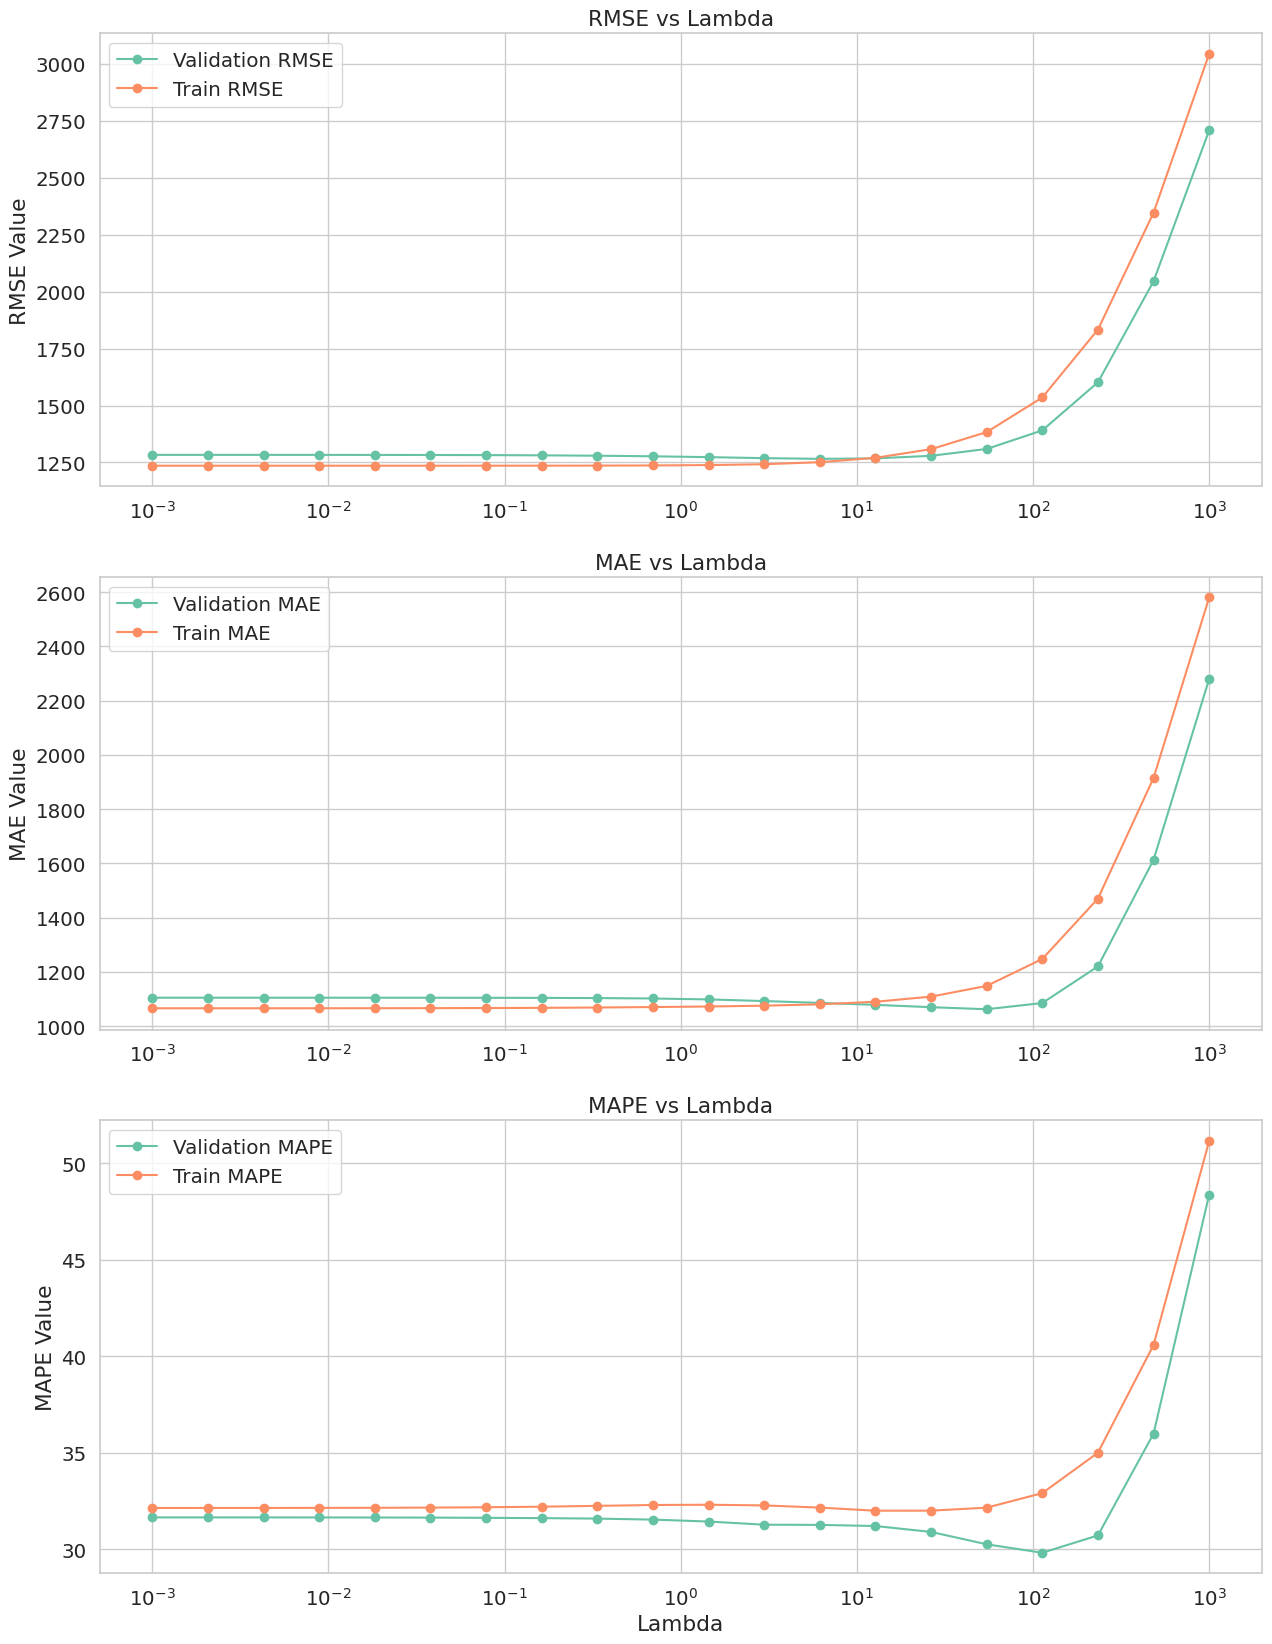

In [275]:
fig, axes = plt.subplots(3, figsize=(15, 20))
axes[0].plot(lambdas, metrics_val[:, 0], label='Validation RMSE', marker='o')
axes[0].plot(lambdas, metrics_train[:, 0], label='Train RMSE', marker='o')

axes[1].plot(lambdas, metrics_val[:, 1], label='Validation MAE', marker='o')
axes[1].plot(lambdas, metrics_train[:, 1], label='Train MAE', marker='o')

axes[2].plot(lambdas, metrics_val[:, 2], label='Validation MAPE', marker='o')
axes[2].plot(lambdas, metrics_train[:, 2], label='Train MAPE', marker='o')

# axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('RMSE Value')
axes[0].set_title('RMSE vs Lambda')
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True)

# axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('MAE Value')
axes[1].set_title('MAE vs Lambda')
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True)

axes[2].set_xlabel('Lambda')
axes[2].set_ylabel('MAPE Value')
axes[2].set_title('MAPE vs Lambda')
axes[2].set_xscale('log')
axes[2].legend()
axes[2].grid(True)

plt.show()


Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

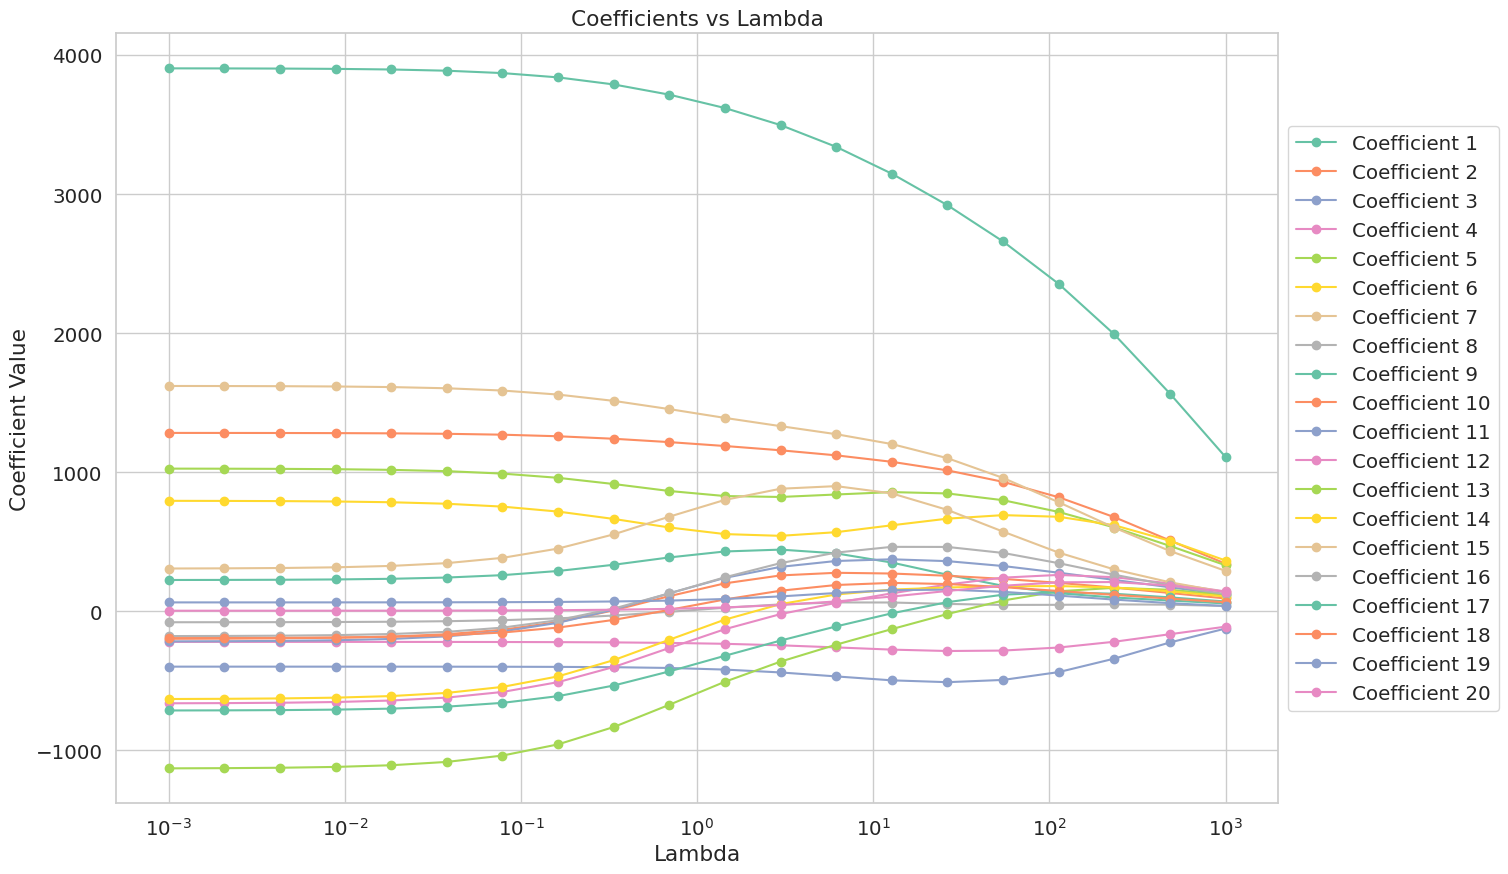

In [276]:

coeffs = np.zeros((len(lambdas), 28))
for i, model in enumerate(models):
    coeffs[i] = model.theta

fig, ax = plt.subplots(figsize=(15, 10))

for i in range(len(lambdas)):
    ax.plot(lambdas, coeffs[:, i], label=f'Coefficient {i+1}', marker='o')

ax.set_xlabel('Lambda')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficients vs Lambda')
ax.set_xscale('log')


ax_legend = fig.add_axes([0.8, 0.2, 0.1, 0.6])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_legend.axis('off')

plt.show()

**Ответ**: на графике видно, что при увеличении гиперпараметра значения коэффициентов уменьшаются. Это означает, что регуляризация сильно штрафует модель. Поэтому коэффициенты уменьшаются, чтобы уменьшить ошибку.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [277]:
optimal_lambda = lambdas[15]
print(optimal_lambda)

optimal_model = models[15]

y_pred = optimal_model.predict(X_test_final)
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = 100 * (np.abs(y_test - y_pred) / y_test).mean()

print("Test model:\t RMSE = {:.3f} \t MAE = {:.3f} \t MAPE = {:.3f}".format(rmse, mae, mape))

54.555947811685144
Test model:	 RMSE = 1291.567 	 MAE = 1072.169 	 MAPE = 28.509


Сделайте выводы.

В очередной раз мы убеждаемся в важности предобработки данных перед обучением модели. Данное задание показывает, что важно учитывать и зависимости в данных, иначе при подсчете коэффициентов может получиться вырожденная матрица, а это является проблемой. Далее мы решаем эту проблему с помощью регуляризации, а также выбираем оптимальное значение гиперпараметра при помощи анализа ошибок на обучающей и валидационной выборках. В конце считаем предсказания для тестовой выборки и получаем неплохие значения ошибок.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

![bigdata.jpg](attachment:bigdata.jpg)

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [278]:
mean = 0  # начало координат
std_dev = 0.1  # стандартное отклонение

# Генерируем начальные коэффициенты из нормального распределения
initial_coefficients = np.random.normal(mean, std_dev, size=(X_train_final.shape[1] + 1))

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [279]:
class RidgeRegressionSGD:
    def __init__(self, lambd=0.1, learning_rate=0.01, batch_size=128, max_iter=1000, tol=1e-4, fit_intercept=True):
        self.fit_intercept = fit_intercept # наличие свободного члена
        self.lambd = lambd  # параметр регуляризации
        self.learning_rate = learning_rate  # скорость обучения
        self.batch_size = batch_size  # размер батча
        self.max_iter = max_iter  # максимальное количество итераций
        self.tol = tol  # порог остановки итераций
        self.rmse_metrics_train = []
        self.mae_metrics_train = []
        self.mape_metrics_train = []
        self.rmse_metrics_val = []
        self.mae_metrics_val = []
        self.mape_metrics_val = []

    def fit(self, X_train, y_train, initial_coeffs, X_val, y_val):
        n, d = X_train.shape

        if self.fit_intercept:
            X_train = np.c_[np.ones((n, 1)), X_train]
            X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]
            d += 1

        # Инициализация коэффициентов
        self.coeffs = initial_coefficients

        # Градиентный спуск
        for _ in range(self.max_iter):
            # Перемешиваем данные
            X_shuffled, y_shuffled = shuffle(X_train, y_train, random_state=0)

            # Проходим по батчам
            for i in range(0, len(X), self.batch_size):

                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                if len(X_batch) == 0: break
                # Вычисляем градиент для текущего батча
                gradient = self.compute_gradient(X_batch, y_batch)

                # Обновляем коэффициенты
                self.coeffs -= self.learning_rate * gradient

                # Проверяем условие остановки
                if np.linalg.norm(self.learning_rate * gradient) < self.tol:
                    return self

            # Считаем ошибки по обучающей выборке
            y_pred_train = np.dot(X_train, self.coeffs)
            self.rmse_metrics_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
            self.mae_metrics_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
            self.mape_metrics_train.append(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)

            # Считаем ошибки по валидационной выборке
            y_pred_val = np.dot(X_val, self.coeffs)
            self.rmse_metrics_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
            self.mae_metrics_val.append(metrics.mean_absolute_error(y_val, y_pred_val))
            self.mape_metrics_val.append(np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100)

        return self

    def compute_gradient(self, X_batch, y_batch):
        # Вычисляем градиент по батчу
        n = len(X_batch)
        y_pred = np.dot(X_batch, self.coeffs)
        error = y_pred - y_batch
        gradient = 2 / n * np.dot(X_batch.T, error) + 2 * self.lambd * self.coeffs

        return gradient

    def predict(self, X):

        n = X.shape[0]

        # Добавляем константный признак, если fit_intercept=True
        if self.fit_intercept:
            X = np.c_[np.ones((n, 1)), X]
        # Предсказываем значения
        y_pred = np.dot(X, self.coeffs)

        return y_pred


Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

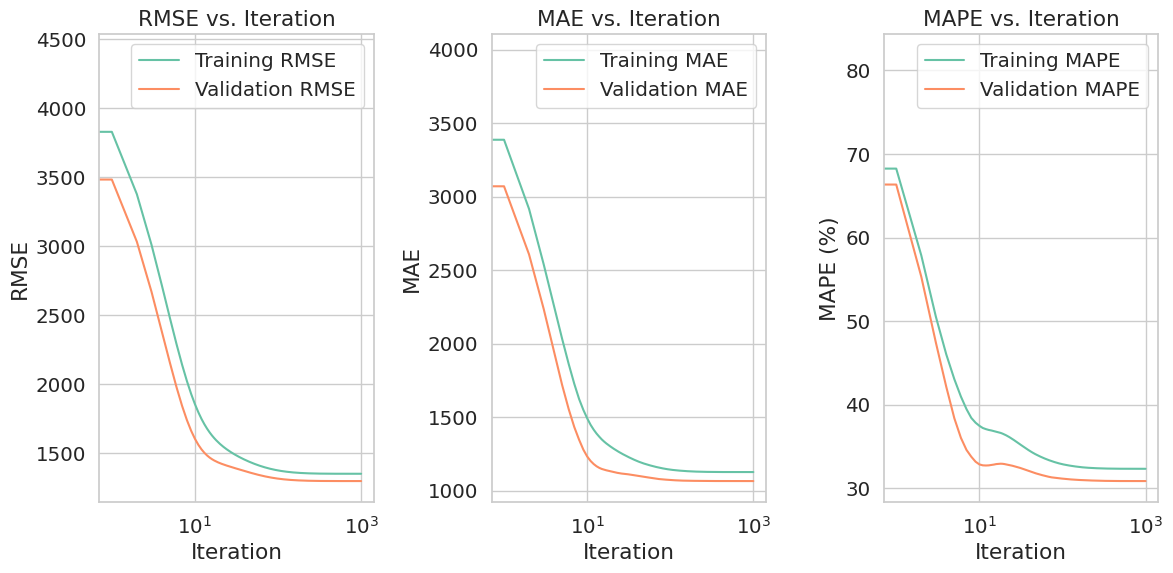

In [280]:

# Инициализация модели и параметров
ridge_sgd = RidgeRegressionSGD()

ridge_sgd.fit(X_train_final, y_train, initial_coefficients, X_val_final, y_val)

train_rmse, train_mae, train_mape = ridge_sgd.rmse_metrics_train, ridge_sgd.mae_metrics_train, ridge_sgd.mape_metrics_train
val_rmse, val_mae, val_mape = ridge_sgd.rmse_metrics_val, ridge_sgd.mae_metrics_val, ridge_sgd.mape_metrics_val

# Построение графиков
plt.figure(figsize=(12, 6))

# График RMSE
plt.subplot(1, 3, 1)
plt.plot(range(len(train_rmse)), train_rmse, label='Training RMSE')
plt.plot(range(len(val_rmse)), val_rmse, label='Validation RMSE')
plt.xlabel('Iteration')
plt.xscale('log')
plt.ylabel('RMSE')
plt.title('RMSE vs. Iteration')
plt.legend()

# График MAE
plt.subplot(1, 3, 2)
plt.plot(range(len(train_mae)), train_mae, label='Training MAE')
plt.plot(range(len(val_mae)), val_mae, label='Validation MAE')
plt.xlabel('Iteration')
plt.xscale('log')
plt.ylabel('MAE')
plt.title('MAE vs. Iteration')
plt.legend()

# График MAPE
plt.subplot(1, 3, 3)
plt.plot(range(len(train_mape)), train_mape, label='Training MAPE')
plt.plot(range(len(val_mape)), val_mape, label='Validation MAPE')
plt.xlabel('Iteration')
plt.xscale('log')
plt.ylabel('MAPE (%)')
plt.title('MAPE vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

Посчитайте ошибку на тестовой выборке.

In [282]:

y_pred = ridge_sgd.predict(X_test_final)
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = 100 * (np.abs(y_test - y_pred) / y_test).mean()

print("Test model:\t RMSE = {:.3f} \t MAE = {:.3f} \t MAPE = {:.3f}".format(rmse, mae, mape))

Test model:	 RMSE = 1279.574 	 MAE = 1071.876 	 MAPE = 28.978


Сделайте выводы. По графикам наглядно видно, как работает градиентный спуск: при инициализации коэффициентов видно, что ошибка большая, а после с каждой итерацией ошибка уменьшается. Также по графикам видно, что больше 100 итераций делать бесполезно, потому что дальше ошибка не падает.

И интересное замечание: ошибки получились почти одинаковые с 4ым заданием, что показывает, как разными методами можно достичь схожего результата.